# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
# Impotamos todas las librerías que creemos hasta el momento podemos llegar a utilizar

import itertools

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import webtext

import spacy
from time import time
#nlp = spacy.load("es_core_news_sm")

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\machk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\machk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## 1. Análisis exploratorio de los 3 dataset.

***Cargamos los 3 dataset Train , Test y  Dev .Detallamos lo que realizamos en la exploración.***

***Tenemos 8 columnas en cada uno con información importante, que detallamos. 
Algunas de ellas las vamos a ignorar ya que no aportan a nuestro proyecto, estableciendo un pre filtrado.***

***0_review_id - es un codigo por cada instancia o review de un producto adquirido, es un valor único.***

***1_product_id - es un valor unico para cada producto y cada producto puede tener multiples reviews.***

***2_reviewer_id - es un valor único para cada reviewer y existen reviewers que califican varios productos.***

***3_stars - Escala del 1 al 5 en la puntuación otorgada por el comprador.***

***4_review_body - Descripción más en detalle de la review.***

***5_review_title - Corresponde al título. una descripción mínima.***

***6_language - Informa el idioma, que es el español, el cual no cambia.***

***7_product_category - Hay 30 categorias y estan presentes en los 3 datasets.***


In [3]:
df_train= pd.read_json('amazon/dataset_es_train.json', lines= True)
df_train

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


In [4]:
#Elegimos una instancia del dataset al azar de cada uno y seleccionamos el *headline*

index_random = np.random.randint(0,high = df_train.shape[0])
titular = df_train.iloc[index_random].review_title
print(index_random, titular)

90851 Bien por el precio


In [5]:
df_dev= pd.read_json('amazon/dataset_es_dev.json', lines= True)
df_dev

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless


In [6]:
df_test= pd.read_json('amazon/dataset_es_test.json', lines= True)
df_test

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


In [7]:
# Ejemplo review_body
df_test.iloc[4,4]

'Pues tenía interés en este libro y probé la versión kindle. se abre la portada pero nada más. parece una mala broma pero me iba a gastar el dedo de tanto tratar que pasara de página de alguna forma. No puedo valorar nada de nada.'

In [8]:
df_train.info()  # info ya nos informa que no hay valores nulos en este dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [9]:
df_dev.info()    # info ya nos informa que no hay valores nulos en este dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [10]:
df_test.info()   # info ya nos informa que no hay valores nulos en este dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [11]:
print(len(df_train.review_id.value_counts()))
print(len(df_test.review_id.value_counts()))
print(len(df_dev.review_id.value_counts()))

200000
5000
5000


In [12]:
print([df_train.review_id.value_counts()])
print([df_train.review_id.value_counts().sum()])

[es_0031142    1
es_0491702    1
es_0531952    1
es_0926091    1
es_0098389    1
             ..
es_0911665    1
es_0086525    1
es_0267924    1
es_0031128    1
es_0083549    1
Name: review_id, Length: 200000, dtype: int64]
[200000]


In [13]:
print(len(df_train.reviewer_id.value_counts()))
print(len(df_test.reviewer_id.value_counts()))
print(len(df_dev.reviewer_id.value_counts()))

179076
4988
4982


In [14]:
print([df_train.reviewer_id.value_counts()])
print([df_train.reviewer_id.value_counts().sum()])

[reviewer_es_0431022    7
reviewer_es_0437514    7
reviewer_es_0588051    7
reviewer_es_0035822    6
reviewer_es_0659252    6
                      ..
reviewer_es_0028897    1
reviewer_es_0224021    1
reviewer_es_0761537    1
reviewer_es_0784839    1
reviewer_es_0495090    1
Name: reviewer_id, Length: 179076, dtype: int64]
[200000]


In [15]:
print(len(df_train.product_id.value_counts()))
print(len(df_test.product_id.value_counts()))
print(len(df_dev.product_id.value_counts()))

150938
4959
4964


In [16]:
print([df_train.product_id.value_counts()])
print([df_train.product_id.value_counts().sum()])

[product_es_0261843    8
product_es_0568956    7
product_es_0087077    7
product_es_0616440    7
product_es_0741712    7
                     ..
product_es_0759372    1
product_es_0959311    1
product_es_0575751    1
product_es_0828860    1
product_es_0468904    1
Name: product_id, Length: 150938, dtype: int64]
[200000]


In [17]:
print(df_train.language.unique())
print(df_test.language.unique())
print(df_dev.language.unique())

['es']
['es']
['es']


In [18]:
print(df_train.stars.unique())
print(df_test.stars.unique())
print(df_dev.stars.unique())

[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]


In [19]:
print(df_train.product_category.unique(), len(df_train.product_category.unique()))
print(df_test.product_category.unique(), len(df_test.product_category.unique()))
print(df_dev.product_category.unique(), len(df_dev.product_category.unique()))

['electronics' 'drugstore' 'wireless' 'shoes' 'home' 'luggage'
 'office_product' 'kitchen' 'pc' 'toy' 'industrial_supplies' 'furniture'
 'pet_products' 'sports' 'home_improvement' 'grocery' 'lawn_and_garden'
 'beauty' 'other' 'watch' 'automotive' 'book' 'apparel' 'video_games'
 'camera' 'baby_product' 'personal_care_appliances' 'jewelry'
 'digital_ebook_purchase' 'musical_instruments'] 30
['wireless' 'home' 'toy' 'digital_ebook_purchase' 'pc' 'lawn_and_garden'
 'sports' 'camera' 'home_improvement' 'apparel' 'automotive' 'drugstore'
 'electronics' 'other' 'beauty' 'office_product' 'furniture' 'kitchen'
 'shoes' 'video_games' 'personal_care_appliances' 'pet_products' 'book'
 'jewelry' 'watch' 'luggage' 'baby_product' 'industrial_supplies'
 'musical_instruments' 'grocery'] 30
['wireless' 'apparel' 'sports' 'home_improvement' 'beauty' 'home'
 'baby_product' 'pc' 'toy' 'book' 'personal_care_appliances' 'kitchen'
 'lawn_and_garden' 'pet_products' 'drugstore' 'office_product' 'furniture'
 'el

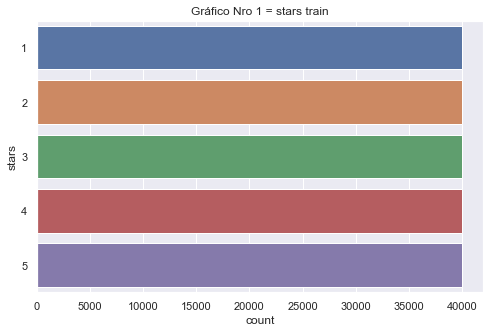

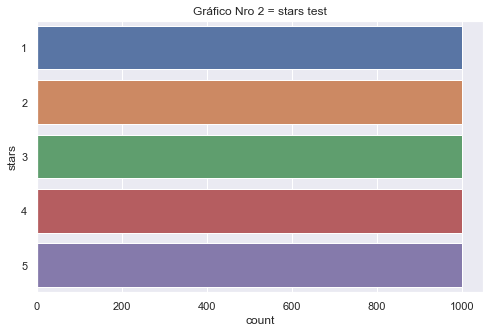

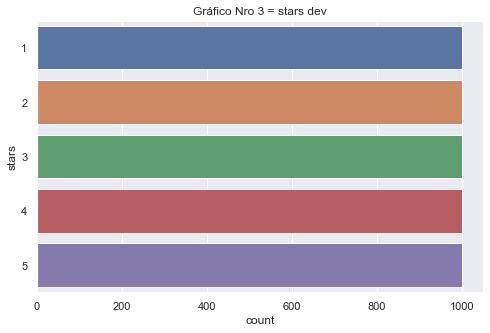

In [20]:
fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, y='stars')
plt.title('Gráfico Nro 1 = stars train')
#plt.savefig('imagenes/stars_train.png', dpi=200)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_test, y='stars')
plt.title('Gráfico Nro 2 = stars test')
#plt.savefig('imagenes/stars_test.png', dpi=200)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_dev, y='stars')
plt.title('Gráfico Nro 3 = stars dev')
#plt.savefig('imagenes/stars_dev.png', dpi=200)
plt.show()

In [21]:
print([df_train.product_category.value_counts()])
print([df_train.product_category.value_counts().sum()])


[home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery      

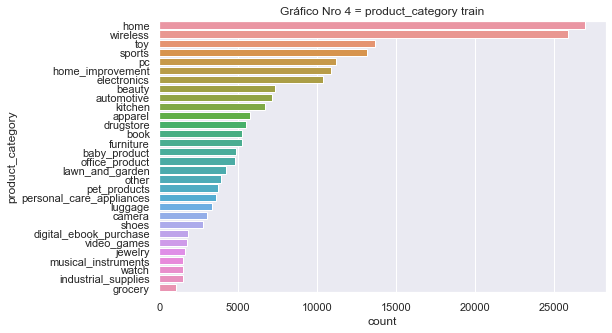

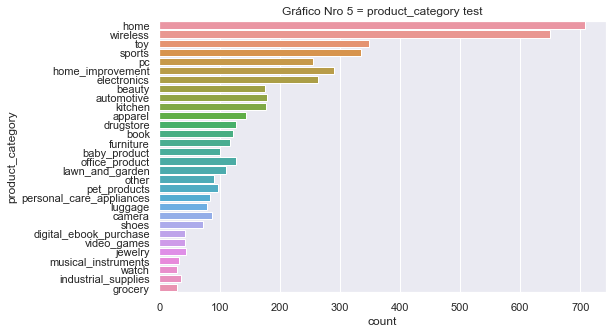

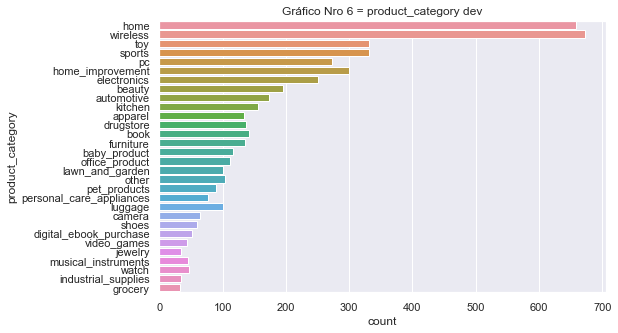

In [22]:
fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('Gráfico Nro 4 = product_category train')
#plt.savefig('imagenes/product_category_train.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_test, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('Gráfico Nro 5 = product_category test')
#plt.savefig('imagenes/product_category_test.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

fig=plt.figure(figsize=(8, 5))
sns.countplot(data=df_dev, y='product_category', order = df_train['product_category'].value_counts().index)
plt.title('Gráfico Nro 6 = product_category dev')
#plt.savefig('imagenes/product_category_dev.png', dpi=200, bbox_inches='tight', pad_inches=0.3)
plt.show()

In [23]:
 # FILTRADO DE COLUMNAS
df_train = df_train.filter(["stars","review_body","review_title", "product_category"])
print(df_train.shape)
df_train.head()

(200000, 4)


,stars,review_body,review_title,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes


In [24]:
 # FILTRADO DE COLUMNAS
df_test = df_test.filter(["stars","review_body","review_title", "product_category"])
print(df_test.shape)

(5000, 4)


In [25]:
 # FILTRADO DE COLUMNAS
df_dev = df_dev.filter(["stars","review_body","review_title", "product_category"])
print(df_dev.shape)

(5000, 4)


***Los gráficos de los 3 dataset nos muestran que están balanceados, tienen iguales distribuciones en todas sus instancias. No tienen valores nulos.*** 

## 2. PREPROCEZAMIENTO DE DATOS - NORMALIZAR


### 2.1 Limpieza de caracteres.

In [26]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
print(stopwords)
#stopword.remove('no')
#stopword.remove('not')

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [27]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()



In [28]:
%%time
# Recorremos todos los review_body y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_body_list=[]
for review_body in df_train.review_body:
    
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    review_body=re.sub("[^a-zA-Z]"," ",str(review_body))
    
    # Pasamos todo a minúsculas
    review_body=review_body.lower()
    
    # Tokenizamos para separar las palabraS
    review_body=nltk.word_tokenize(review_body)
    
    # Eliminamos las palabras de menos de 3 letras
    review_body = [palabra for palabra in review_body if len(palabra)>3]
    
    # Sacamos las Stopwords
    review_body = [palabra for palabra in review_body if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review_body=[stemmer.stem(palabra) for palabra in review_body]
    # Por ultimo volvemos a unir
    review_bodyr=" ".join(review_body)
    
    # Vamos armando una lista con todoS
    review_body_list.append(review_body)
    #df_train["review_body_normalizado"] = review_body_list

Wall time: 4min 23s


In [29]:
df_train["review_body_stem"] = review_body_list
df_train.tail()

,stars,review_body,review_title,product_category,review_body_stem
199995,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,electronics,"[mando, funciona, perfectament, cumpl, toda, f..."
199996,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,electronics,"[compr, bater, cierta, reticencia, result, ins..."
199997,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,apparel,"[buena, calidad, satisfecha, compra]"
199998,5,Perfecto para el cumple de mi hijo,Recomendado,toy,"[perfecto, cumpl, hijo]"
199999,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,home,"[bien, brocha, buena, meno, pelito, quiz, pesa..."


In [30]:
df_train_stem = pd.concat([df_train.review_body_stem,df_train.stars],axis=1)
df_train_stem.dropna(axis=0,inplace=True)  # Por si quedaron vacios  
df_train_stem.head()

,review_body_stem,stars
0,"[bueno, pantalla, meno, mese, recibido, respue...",1
1,"[horribl, comprar, sabemo, ingl, inform, tico,...",1
2,"[obligan, comprar, unidad, llega, solo, forma,...",1
3,"[entro, descalificar, vendedor, solo, puedo, d...",1
4,"[llega, tard, talla, equivocada]",1


In [31]:
# guardar....
df_train_stem.to_csv('df_train_stem.csv', index=False)


## 3. VECTORIZACION

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [33]:
review_body = df_train_stem['review_body_stem'] 

In [34]:
matriz_reviews = cou_vec.fit_transform(list ( df_train_stem['review_body_stem'] .astype('U').values))

In [35]:
# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abr', 'abrir', 'abrirlo', 'absoluto', 'acaba', 'acabado', 'acabo', 'accesorio', 'aceit', 'acept', 'aconsejo', 'adapta', 'adaptador', 'adecuada', 'adecuado', 'adem', 'adema', 'adhesivo', 'agarr', 'agrad', 'agua', 'aguanta', 'agujero', 'ahora', 'air', 'ajust', 'ajusta', 'ajustan', 'ajustar', 'alguien', 'alguna', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'anterior', 'anuncio', 'apaga', 'apagado', 'aparato', 'aparec', 'apart', 'apena', 'aplicaci', 'appl']


## 4. MODELAR

***VAMOS A USAR UN MODELO DE CLASIFICACION.***

In [36]:
#stemmizado

df_train_stem.loc[ df_train_stem.stars == 1, 'label'] = "negativo"
df_train_stem.loc[ df_train_stem.stars == 2, 'label'] = "negativo"
df_train_stem.loc[ df_train_stem.stars == 3, 'label'] = "negativo"
df_train_stem.loc[ df_train_stem.stars == 4, 'label'] = "positivo"
df_train_stem.loc[ df_train_stem.stars == 5, 'label'] = "positivo"

# mas codigo a veces explica mejor el problema.
# otra opcion utilizar query filter

In [38]:
x = matriz_reviews.toarray()
y = df_train_stem ['label'] 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["negativo","positivo"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Empecemos por un simple Naive Bayes para tener un benchmark de referencia para el accuracy.

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6807


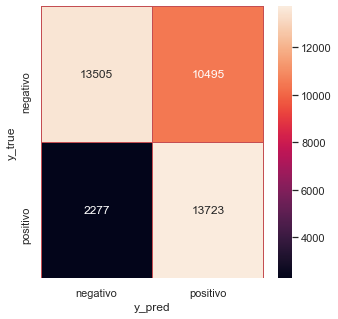

In [41]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest
a. Veamos cómo funciona un random forest para predecir

In [42]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

#acc:  0.77705
#Wall time: 15min 30s(con 16gb de memoria) -wall time: 38min 59s Parser:426 ms(con 4gb)

acc:  0.77705
Wall time: 38min 59s
Parser   : 426 ms


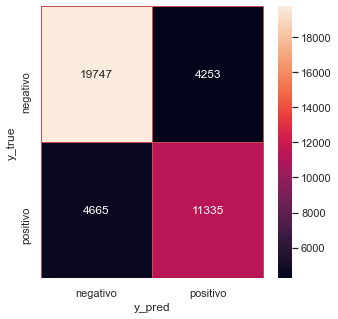

In [43]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

C:\Users\machk\miniconda3\envs\CursoDataScienceP7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


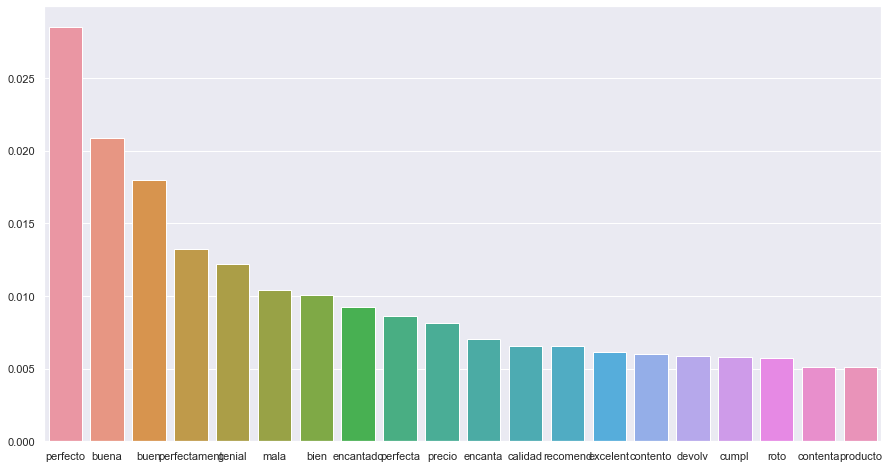

In [44]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.
a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [45]:
%%time
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

C:\Users\machk\miniconda3\envs\CursoDataScienceP7\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Wall time: 5min 25s
Parser   : 207 ms


0.79745

In [ ]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

In [ ]:
#dump guardar modelos
#load capturar o traer modelo

##########################
# SAVE-LOAD using joblib #
##########################
from joblib import dump, load

In [ ]:
# SAVE nb(nombre modelo)
dump(nb, 'nb.joblib')

# otra opcion para guardar modelos preentrenados
#https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
# LOAD
nb = load('nb.joblib')


## 7. Explora las posibilidades

Si llegaste hasta acá, ya cuentas con todas las herramientas para poder explorar qué sucede con el poder predictivo cuando van cambiando la manera en que procesas y vectorizas el texto. Algunas sugerencias para explorar son las siguientes:

1. Prueba con Stemmizar en vez de lemmantizar
1. Cambia el numero de features que esta tomando.
1. Prueba con TF-IDF.
1. Incluye los 2-gramas. ¿Qué era eso?   -------- 2 palabras describen el problema mejor que una
1. Conserve los signos de exclamación y pregunta del texto

***LEMMATIZAR CON SPACY***



In [ ]:
df_train=df_train[['review_title','review_body','product_category','stars']]
df_test=df_test[['review_title','review_body','product_category','stars']]
df_dev=df_dev[['review_title','review_body','product_category','stars']]

In [ ]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_sm")
doc = nlp(sentences[0])


In [ ]:
def cleaner(df, columna='review_body'):
    # Regex patrón solo para caracteres alphanumericos, texto con guiones con 2 o más caracteres
    pattern = re.compile(r"[A-Za-z0-9\-]{2,50}")
    df[columna+'_clean'] = df[columna].str.findall(pattern).str.join(' ')
    return df

In [ ]:
cleaner(df_train, 'review_body')
cleaner(df_train, 'review_title')

cleaner(df_test, 'review_body')
cleaner(df_test, 'review_title')

cleaner(df_dev, 'review_body')
cleaner(df_dev, 'review_title');

In [ ]:
def lemma(x):
    doc=nlp(x)
    titular=[token.lemma_ for token in doc]
    return titular

In [ ]:
%%time
df_test['body_lemma']=df_test.review_body_clean.apply(lambda x: lemma(x))

In [ ]:
def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc]
#                   if tok.is_alpha and tok.text.lower() not in stopwords] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=10000):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

In [ ]:
%%time
df_test['review_body_lemma'] = preprocess_pipe(df_test['review_body_clean'])

In [ ]:
df_test.head()

## 3. VECTORIZACION CON TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidfvectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords.words("spanish"), ngram_range=(1, 1), max_df=1.0, min_df=0.2, max_features=500)

txt_fitted = tfidfvectorizer.fit(df_propiedades_filtrado['description_clean'].values.astype('U'))
txt_transformed = txt_fitted.transform(df_propiedades_filtrado['description_clean'].values.astype('U'))  # hacer con columna lemm o stemm

tfidf_tokens = tfidfvectorizer.get_feature_names()

# Imprimimos las features
print("Atributos:\n{}".format(tfidfvectorizer.get_feature_names()))

In [ ]:
#dump guardar modelos
#load capturar o traer modelo


##########################
# SAVE-LOAD using joblib #
##########################
from joblib import dump, load


In [ ]:
# SAVE nb(nombre modelo)
dump(nb, 'nb.joblib')

# otra opcion para guardar modelos preentrenados
#https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
# LOAD
nb = load('nb.joblib')


In [ ]:
from sinfo import sinfo
sinfo()